In [2]:
import sys;sys.path.append('./src')
import sqlite3
import re
from DB import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import re 
from collections import Counter

In [3]:
low_category_db='../data/database/1112_low_prodcuts_text_category.db'
high_category_db='../data/database/1112_high_prodcuts_text_category.db'
Hconn2,Hc2=get_db_conn(high_category_db)
Lconn2,Lc2=get_db_conn(low_category_db)

('table', 'product_text', 'product_text', 2, 'CREATE TABLE product_text(id integer primary key,username,baka_star,each_id,pd_url,pd_star,pd_title,text_len,pd_text, category1, category2, category3, category4, category5, category6, category7, category8, category9, category10, pd_name)')


In [ ]:
Hc2.execute('''select distinct id,category1,category2,category3,category4,category5,category6,category7 from product_text where category6!='' ''')



In [ ]:
Lc2.execute('''
select distinct id,category1,category2,category3,category4,category5,category6,category7
from product_text
where category1!='プ'  ''')


i=0
for row in Lc2:
    print(row)
    i+=1
    if i==100:
        break


In [4]:
Lc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')
Hc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')

low_category=[x[0] for x in Lc2]
high_category=[x[0] for x in Hc2]

low_counter=Counter(low_category)
high_counter=Counter(high_category)


In [5]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.font_manager._rebuild()

In [ ]:
Lvalues,Lcounts=list(zip(*low_counter.most_common(30)))

#20字以上のラベルは除去している
Lvalues=[x[:20] for x in Lvalues]

plt.style.use('ggplot')
plt.rcParams.update({'font.size':18})
#日本語対応FONT
plt.rcParams['font.family'] = 'IPAPGothic'

size=(8,8)
col=cm.Spectral(np.arange(len(Lcounts))/float(len(Lcounts))) #color指定はcolormapから好みのものを。

plt.figure(figsize=size,dpi=200)
plt.pie(Lcounts,colors=col,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.9)
plt.legend(Lvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
# plt.savefig('低評価category1.png',bbox_inches='tight',pad_inches=0.05)

In [17]:
from operator import itemgetter
print(np.arange(len(Lcounts))/float(len(Lcounts))[1,3,5])
print(Lcol)
Mvalues=list(set(Lvalues+Hvalues))

print(Mvalues)

TypeError: 'float' object is not subscriptable

In [25]:
Lvalues,Lcounts=list(zip(*low_counter.most_common(10)))
Hvalues,Hcounts=list(zip(*high_counter.most_common(10)))
Mvalues=list(set(Lvalues+Hvalues))

Mdict=dict(zip(Mvalues,list(range(0,len(Mvalues)))))


{'ミュージック': 0, 'ホーム＆キッチン': 1, 'スポーツ＆アウトドア': 2, '文房具・オフィス用品': 3, '本': 4, '食品・飲料・お酒': 5, 'パソコン・周辺機器': 6, 'ドラッグストア': 7, 'DVD': 8, '家電＆カメラ': 9}


In [26]:
print(Lvalues,Lcounts)

('本', 'ホーム＆キッチン', '食品・飲料・お酒', 'パソコン・周辺機器', 'スポーツ＆アウトドア', 'ドラッグストア', '家電＆カメラ', 'DVD', 'ミュージック', '文房具・オフィス用品') (245, 115, 71, 71, 70, 55, 54, 52, 49, 48)


In [ ]:
sorted(data_list, key=lambda data: order.index(data["id"]))

In [30]:
data_list=[{'id':x,}for x in range(10)]
order=[1,2,4,7,8,6,9,3,5,10]
print(sorted(data_list, key=lambda data: order.index(data["id"])))

ValueError: '本' is not in list

In [52]:
from operator import itemgetter

print(Lcol)
Mcol=np.array(itemgetter(0,1,3,6,7,5,8,2,4,9)(Lcol))
print(Mcol)



[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.83106498 0.23844675 0.30880431 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.99146482 0.67735486 0.37808535 1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.99807766 0.99923106 0.74602076 1.        ]
 [0.90196078 0.96078431 0.59607843 1.        ]
 [0.66528258 0.86459054 0.64321415 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]
 [0.19946175 0.5289504  0.73910035 1.        ]]
[[0.61960784 0.00392157 0.25882353 1.        ]
 [0.83106498 0.23844675 0.30880431 1.        ]
 [0.99146482 0.67735486 0.37808535 1.        ]
 [0.90196078 0.96078431 0.59607843 1.        ]
 [0.66528258 0.86459054 0.64321415 1.        ]
 [0.99807766 0.99923106 0.74602076 1.        ]
 [0.4        0.76078431 0.64705882 1.        ]
 [0.95686275 0.42745098 0.2627451  1.        ]
 [0.99607843 0.87843137 0.54509804 1.        ]
 [0.19946175 0.5289504  0.73910035 1.        ]]


In [128]:
Hvalues,Hcounts=list(zip(*high_counter.most_common(20)))
Hdict=dict(zip(Hvalues,Hcounts))

Lvalues,Lcounts=list(zip(*high_counter.most_common(20)))
Ldict=dict(zip(Lvalues,Lcounts))

merge_counter=high_counter+low_counter


print(H)


{'PCアクセサリ・サプライ': 37, '家電': 35, 'レディース': 35, 'キッチン用品': 26, 'カメラ': 22, 'メンズ': 22, '外国映画': 21, '栄養補助食品': 19, '携帯電話・スマートフォン': 18, '￥': 17, 'PCパーツ': 16, 'Kindle本': 16, '文学・評論': 15, '日用品': 14, 'ジャズ・フュージョン': 14, '日本映画': 14, '雑誌': 14, 'ビジネス・経済': 13, '科学・テクノロジー': 13, '語学・辞事典・年鑑': 13}


In [108]:
Lc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')
Hc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')

low_category=[x[1] for x in Lc2]
high_category=[x[1] for x in Hc2]

low_counter=Counter(low_category)
high_counter=Counter(high_category)

Lvalues,Lcounts=list(zip(*low_counter.most_common(20)))
Hvalues=high_counter.most_common(20)

print(Hvalues)
print(len(Mvalues))
Lcol=cm.Spectral(np.arange(len(Mcounts))/float(len(Mcounts))) 

[('PCアクセサリ・サプライ', 37), ('家電', 35), ('レディース', 35), ('キッチン用品', 26), ('カメラ', 22), ('メンズ', 22), ('外国映画', 21), ('栄養補助食品', 19), ('携帯電話・スマートフォン', 18), ('￥', 17), ('PCパーツ', 16), ('Kindle本', 16), ('文学・評論', 15), ('日用品', 14), ('ジャズ・フュージョン', 14), ('日本映画', 14), ('雑誌', 14), ('ビジネス・経済', 13), ('科学・テクノロジー', 13), ('語学・辞事典・年鑑', 13)]
27


NameError: name 'Mcounts' is not defined

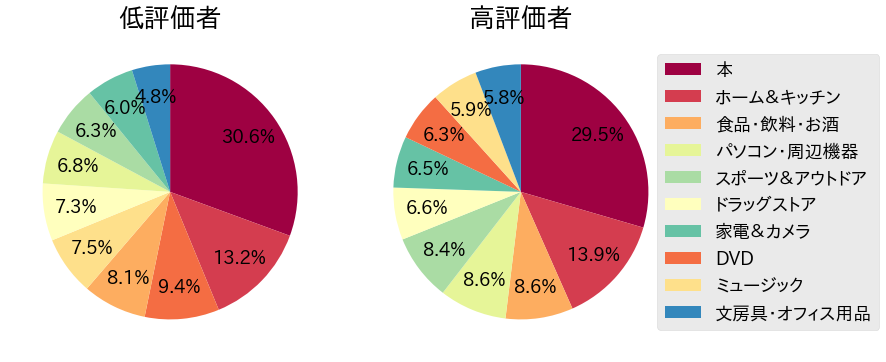

In [82]:
#category1の図形作成コード
Lc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')
Hc2.execute('''select distinct category1,category2,category3,category4 from product_text ''')

low_category=[x[0] for x in Lc2]
high_category=[x[0] for x in Hc2]

low_counter=Counter(low_category)
high_counter=Counter(high_category)

Lvalues,Lcounts=list(zip(*low_counter.most_common(10)))
Hvalues,Hcounts=list(zip(*high_counter.most_common(10)))
Lcol=cm.Spectral(np.arange(len(Lcounts))/float(len(Lcounts))) 
Mcol=np.array(itemgetter(0,1,3,6,7,5,8,2,4,9)(Lcol))



fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

axes=fig.add_subplot(1,2,1)
axes.pie(Hcounts,pctdistance=0.75,colors=Lcol,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
axes.set_title("低評価者")


axes=fig.add_subplot(1,2,2)
plt.pie(Lcounts,pctdistance=0.75,colors=Mcol,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
plt.legend(Lvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
axes.set_title("高評価者")
plt.savefig('1126category1.png',bbox_inches='tight',pad_inches=0.05)

plt.show()

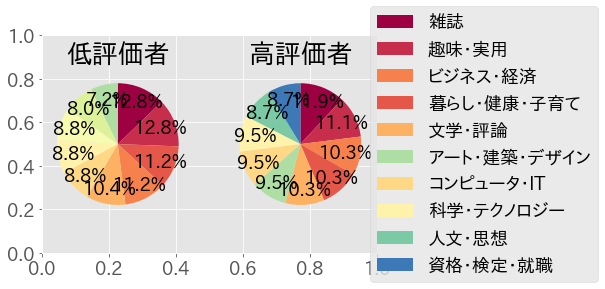

In [101]:
#category2の図形作成コード
Lc2.execute('''select distinct category1,category2,category3,category4 from product_text where category1='本' ''')
Hc2.execute('''select distinct category1,category2,category3,category4 from product_text where category1='本' ''')

low_category=[x[1] for x in Lc2]
high_category=[x[1] for x in Hc2]

low_counter=Counter(low_category)
high_counter=Counter(high_category)

Lvalues,Lcounts=list(zip(*low_counter.most_common(13)))
Hvalues,Hcounts=list(zip(*high_counter.most_common(13)))
Lcol=cm.Spectral(np.arange(len(Lcounts))/float(len(Lcounts))) 
Mcol=np.array(itemgetter(0,1,3,2,4,9,5,6,10,12)(Lcol))



fig, axes = plt.subplots()
fig.subplots_adjust(wspace=0.1, hspace=0.1)

axes=fig.add_subplot(1,2,1)
axes.pie(Lcounts[0:10],pctdistance=0.75,colors=Lcol[0:10],counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
axes.set_title("低評価者")


axes=fig.add_subplot(1,2,2)
axes.pie(Hcounts[0:10],pctdistance=0.75,colors=Mcol,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
axes.legend(Lvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))

axes.set_title("高評価者")
# plt.savefig('1126category1.png',bbox_inches='tight',pad_inches=0.05)

plt.show()

In [ ]:
#category2の図形作成コード
Lc2.execute('''select distinct category1,category2,category3,category4 from product_text where category1='本' ''')
Hc2.execute('''select distinct category1,category2,category3,category4 from product_text where category1='本' ''')

low_category=[x[1] for x in Lc2]
high_category=[x[1] for x in Hc2]

low_counter=Counter(low_category)
high_counter=Counter(high_category)
Lvalues,Lcounts=list(zip(*low_counter.most_common(13)))
Hvalues,Hcounts=list(zip(*high_counter.most_common(13)))

Lcol=cm.Spectral(np.arange(len(Lcounts))/float(len(Lcounts))) 
Mcol=np.array(itemgetter(0,1,3,2,4,9,5,6,10,12)(Lcol))



fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

axes=fig.add_subplot(1,2,1)
axes.pie(Lcounts[0:10],pctdistance=0.75,colors=Lcol[0:10],counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
axes.set_title("低評価者")
plt.legend(Lvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))


axes=fig.add_subplot(1,2,2)
plt.pie(Hcounts[0:10],pctdistance=0.75,colors=Mcol,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')

axes.set_title("高評価者")
# plt.savefig('1126category1.png',bbox_inches='tight',pad_inches=0.05)

plt.show()

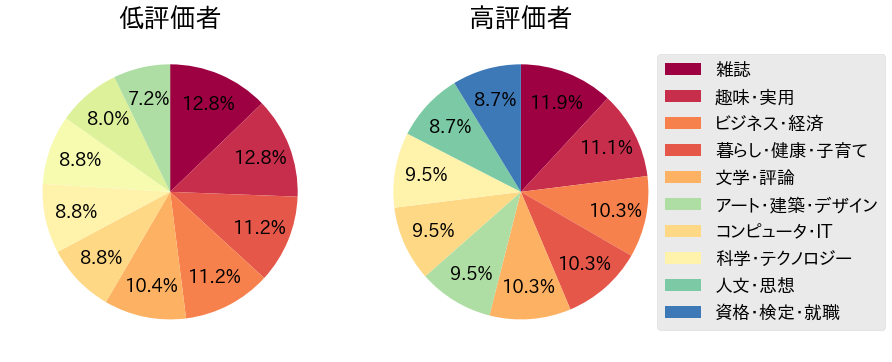

In [99]:
#category2の図形作成コード
Lc2.execute('''select distinct category1,category2,category3,category4 from product_text where category1='本' ''')
Hc2.execute('''select distinct category1,category2,category3,category4 from product_text where category1='本' ''')

low_category=[x[1] for x in Lc2]
high_category=[x[1] for x in Hc2]

low_counter=Counter(low_category)
high_counter=Counter(high_category)

Lvalues,Lcounts=list(zip(*low_counter.most_common(13)))
Hvalues,Hcounts=list(zip(*high_counter.most_common(13)))
Lcol=cm.Spectral(np.arange(len(Lcounts))/float(len(Lcounts))) 
Mcol=np.array(itemgetter(0,1,3,2,4,9,5,6,10,12)(Lcol))



fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

axes=fig.add_subplot(1,2,1)
axes.pie(Lcounts[0:10],pctdistance=0.75,colors=Lcol[0:10],counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
axes.set_title("低評価者")


axes=fig.add_subplot(1,2,2)
axes.pie(Hcounts[0:10],pctdistance=0.75,colors=Mcol,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
axes.legend(Lvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))

axes.set_title("高評価者")
# plt.savefig('1126category1.png',bbox_inches='tight',pad_inches=0.05)

plt.show()

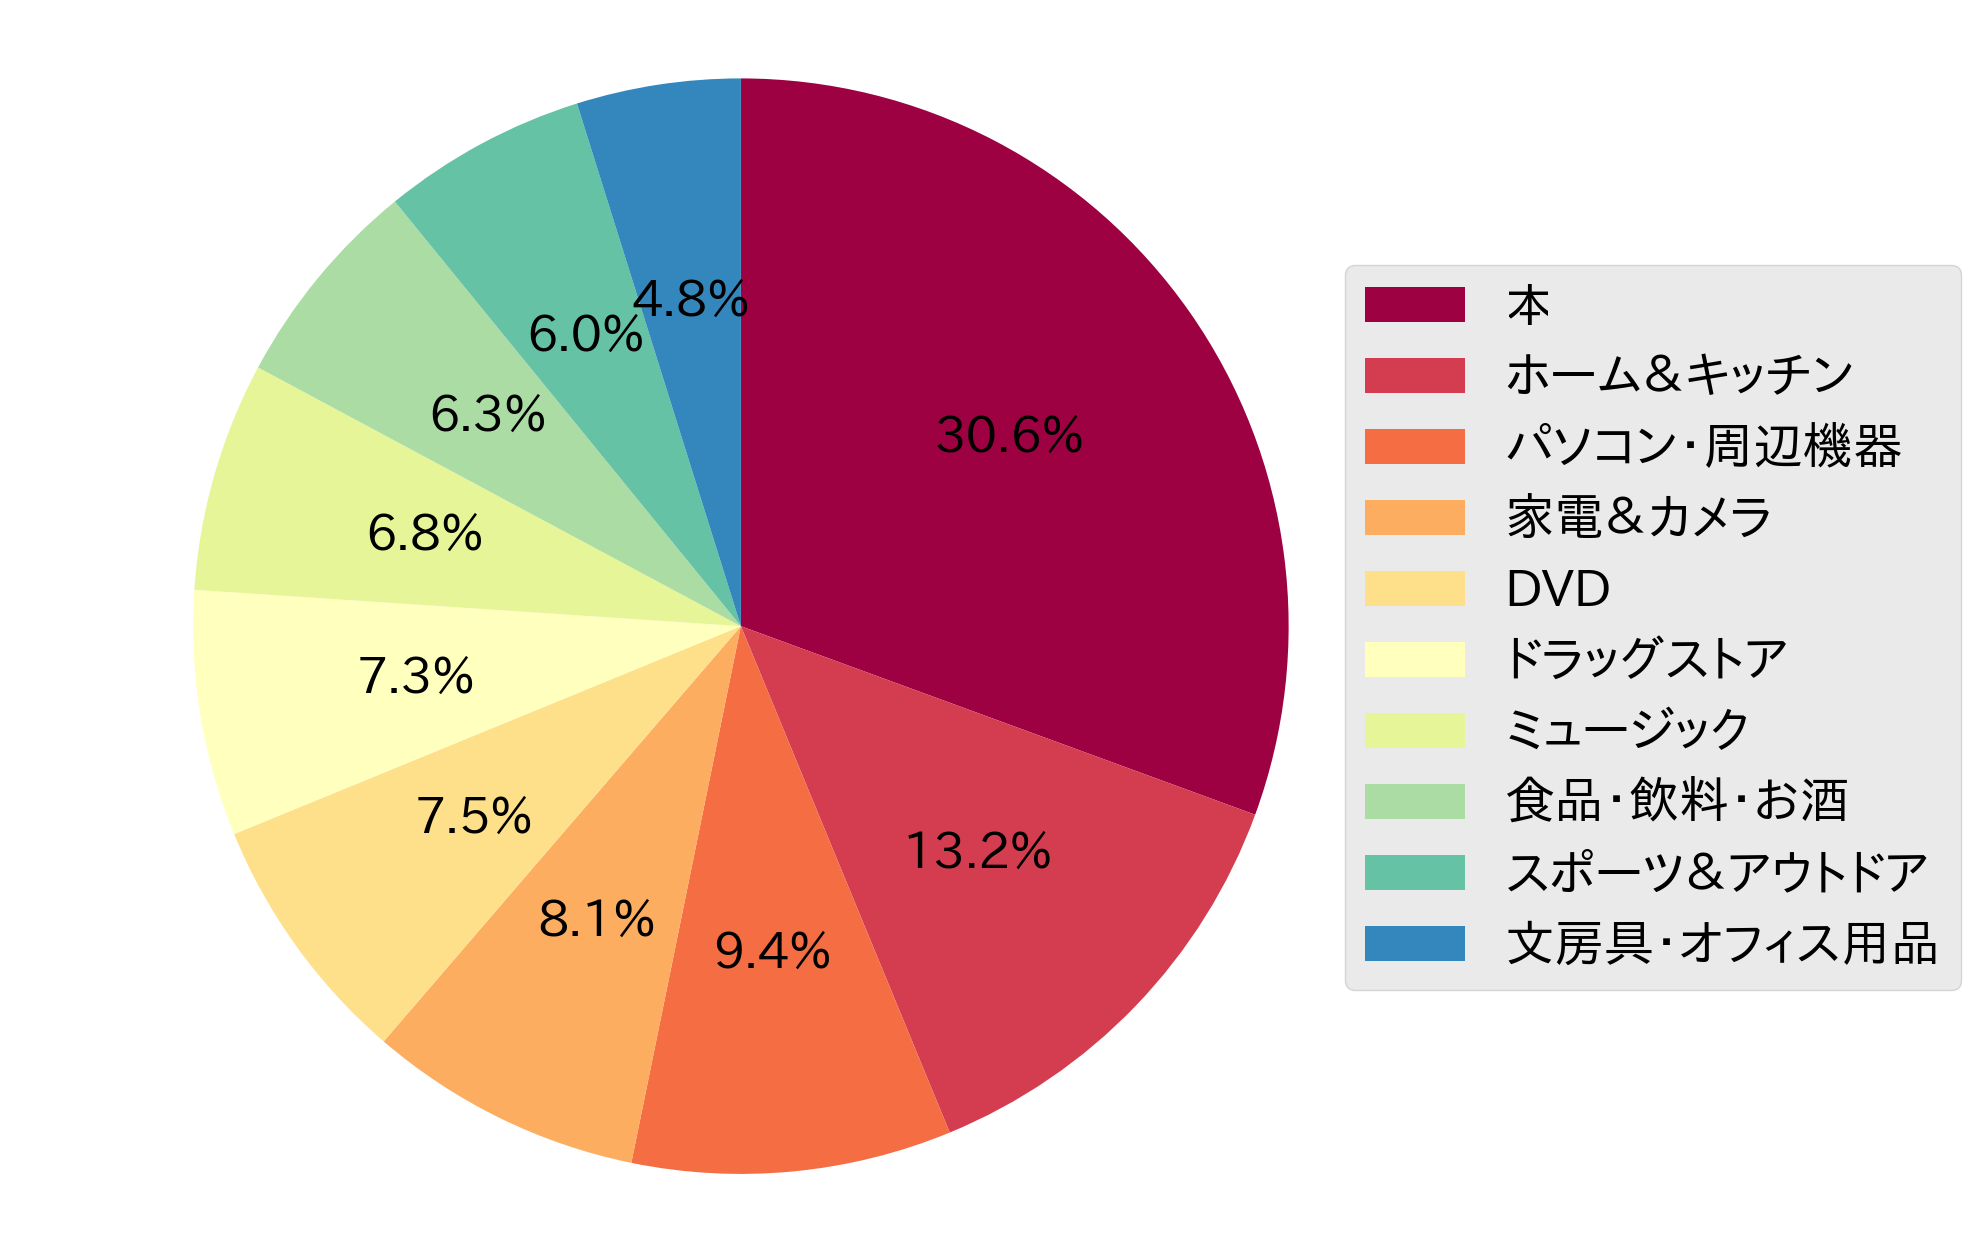

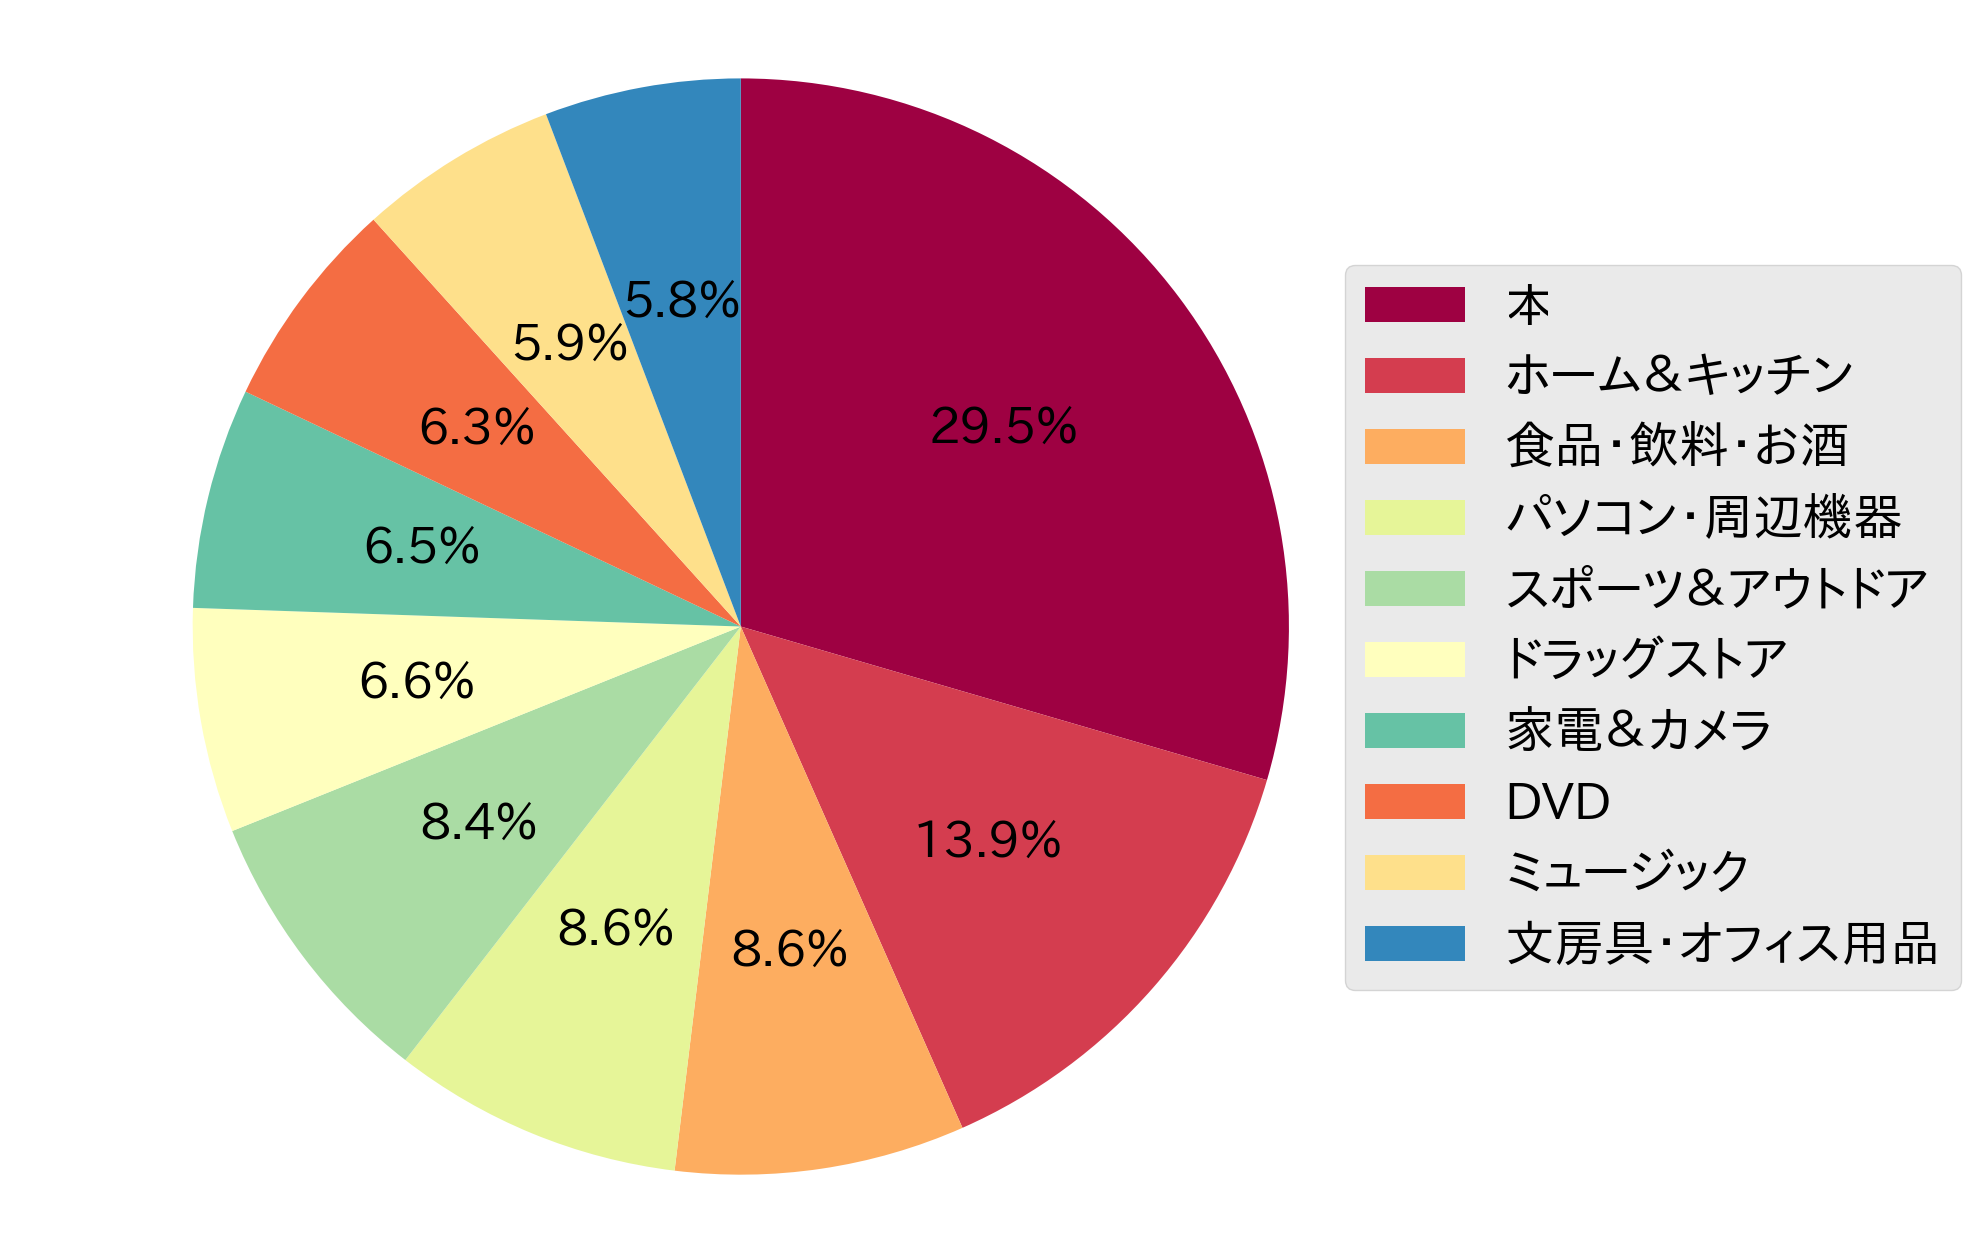

In [62]:
Lvalues,Lcounts=list(zip(*low_counter.most_common(10)))
Hvalues,Hcounts=list(zip(*high_counter.most_common(10)))

#20字以上のラベルは除去している
Lvalues=[x[:20] for x in Lvalues]
Hvalues=[x[:20] for x in Hvalues]
Mvalues=list(set(Lvalues+Hvalues))


size=(8,8)
Lcol=cm.Spectral(np.arange(len(Lcounts))/float(len(Lcounts))) #color指定はcolormapから好みのものを。

plt.figure(figsize=size,dpi=200)
plt.pie(Hcounts,colors=Lcol,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
plt.subplots_adjust(left=0,right=0.9)
plt.legend(Hvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
# plt.savefig('低評価category1.png',bbox_inches='tight',pad_inches=0.05)

plt.figure(figsize=size,dpi=200)
plt.pie(Lcounts,colors=Mcol,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=4 else '')
plt.subplots_adjust(left=0,right=0.9)
plt.legend(Lvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 


# plt.savefig('高評価category1.png',bbox_inches='tight',pad_inches=0.05)

In [ ]:
Hvalues,Hcounts=list(zip(*high_counter.most_common(30)))

#20字以上のラベルは除去している
Hvalues=[x[:20] for x in Hvalues]

plt.style.use('ggplot')
plt.rcParams.update({'font.size':18})
#日本語対応FONT
plt.rcParams['font.family'] = 'IPAPGothic'

size=(8,8)
col=cm.Spectral(np.arange(len(Hcounts))/float(len(Hcounts))) #color指定はcolormapから好みのものを。

plt.figure(figsize=size,dpi=200)
plt.pie(Hcounts,colors=col,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.9)
plt.legend(Hvalues,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('高評価category1.png',bbox_inches='tight',pad_inches=0.05)

In [ ]:
def sql_to_value_count(c,sql_text,category_len=20,category_num=30):
    c.execute(sql_text)
    category=[x[0] for x in c]
    counter=Counter(category)
    values,counts=list(zip(*counter.most_common(category_num)))
    values=[x[:20] for x in values]
    return(values,counts)

In [ ]:
create_pie_fig(Hcounts,Hvalues,'高評価category1.png')

In [ ]:
book_category_txt='''
select distinct category2,id from product_text
where category1=='本' 
'''

l_book_values,l_book_counts=sql_to_value_count(Lc2,book_category_txt,category_num=20)
h_book_values,h_book_counts=sql_to_value_count(Hc2,book_category_txt,category_num=20)

In [ ]:
create_pie_fig(h_book_counts,h_book_values,'高評価category2.png')
create_pie_fig(l_book_counts,l_book_values,'低評価category2.png')


In [ ]:
print(l_book_values)
print(l_book_counts)
print(h_book_values)
print(h_book_counts)


In [ ]:
Hc2.execute('''select distinct baka_star,category2,id from product_text where category1=='本' ''')

i=0
for row in Hc2:
    print(row)
    i+=1
    if i==1000:
        break


In [ ]:
book_category_txt='''
select distinct category3,id from product_text
where category1=='本' 
'''

l2_book_values,l2_book_counts=sql_to_value_count(Lc2,book_category_txt,category_num=20)
h2_book_values,h2_book_counts=sql_to_value_count(Hc2,book_category_txt,category_num=20)

create_pie_fig(h2_book_counts,h2_book_values,'高評価category3.png')
create_pie_fig(l2_book_counts,l2_book_values,'低評価category3.png')